Can you predict the type of a Pokemon based on physical attributes and battling attributes?

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib
matplotlib.use('nbagg')

In [84]:
df = pd.read_csv('data.csv')
df.head()

,id,name,base exp,height,weight,primary type,hp,atk,def,sp atk,sp def,speed
0,1,bulbasaur,64,7,69,grass,45,49,49,65,65,45
1,2,ivysaur,142,10,130,grass,60,62,63,80,80,60
2,3,venusaur,236,20,1000,grass,80,82,83,100,100,80
3,4,charmander,62,6,85,fire,39,52,43,60,50,65
4,5,charmeleon,142,11,190,fire,58,64,58,80,65,80


<IPython.core.display.Javascript object>


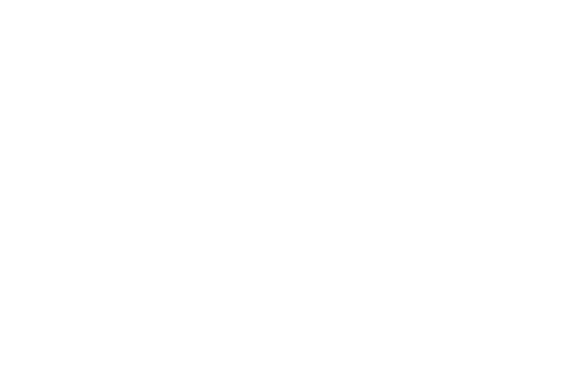

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

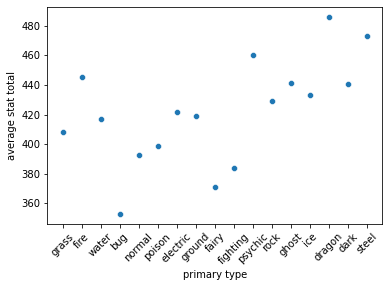

In [85]:
stat_totals = df['hp'] + df['atk'] + df['def'] + df['sp atk'] + df['sp def'] + df['speed']
df['stat total'] = stat_totals
df2 = df
types = df['primary type'].unique()
avg_totals = []
for t in types:
    df2 = df[df['primary type'] == t]
    avg_totals.append(df2['stat total'].mean())
total_plot = sns.scatterplot(x = types, y = avg_totals)
total_plot.set(xlabel='primary type', ylabel='average stat total')
plt.xticks(rotation=45)

Here I have re-created my average stat total to primary type graph that I created in HW3, as I feel it is useful in understanding the general strength disparity between different types. Based on this visualization alone, dragon types appear to be the strongest and bug types appear to be the weakest.

<IPython.core.display.Javascript object>


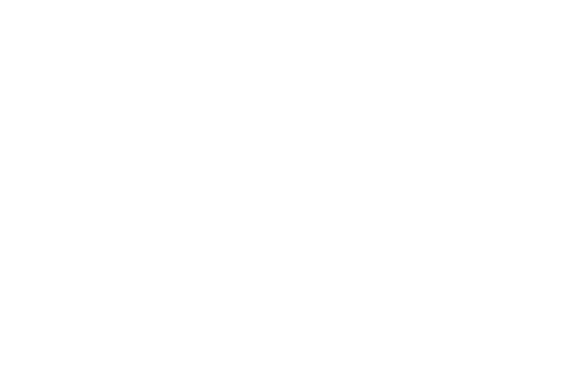

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel')])

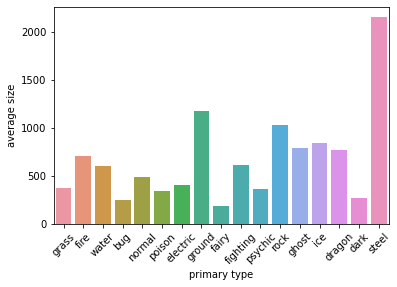

In [86]:
size_totals = df['height'] + df['weight']
df['size'] = size_totals
df3 = df
avg_sizes = []
for t in types:
    df3 = df[df['primary type'] == t]
    avg_sizes.append(df3['size'].mean())
size_plot = sns.barplot(x = types, y = avg_sizes)
size_plot.set(xlabel='primary type', ylabel='average size')
plt.xticks(rotation=45)

I created one column for general size by combining the height and weight stat of each pokemon. I then plotted the average size for each type as a bar graph. Based on this visualization alone, it appears that steel types tend to be the "biggest" by a large margin while fairy types tend to be the "smallest".

<IPython.core.display.Javascript object>


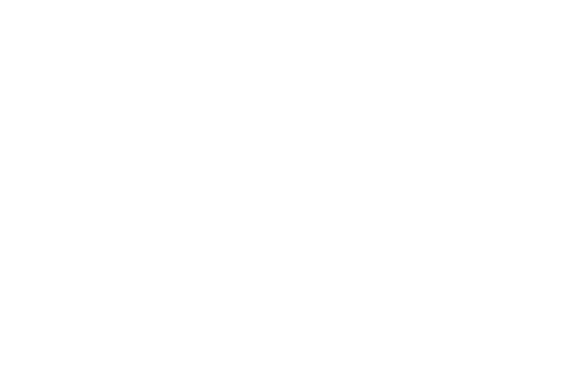

[Text(0.5, 0, 'average size by type'),
 Text(0, 0.5, 'average stat total by type')]

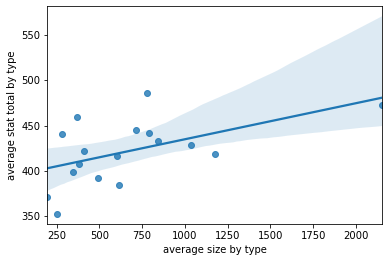

In [87]:
size_vs_strength = sns.regplot(x = avg_sizes, y = avg_totals)
size_vs_strength.set(xlabel='average size by type', ylabel='average stat total by type')

I wanted to see if there was any sort of general correlation between size and stat total. Based on regplot of average size by type vs. average stat total by type, there is somewhat of a positive correlation between the two variables (bigger pokemon tend to be stronger in general across all types).

In [88]:
df['primary type'] = df['primary type'].astype('category')
df['primary type'] = df['primary type'].cat.codes
clust_cols = df.drop('id', 1)
clust_cols.set_index('name', inplace=True, drop=True)
classify_df = clust_cols
clust_cols = clust_cols.drop('primary type', 1)
clust_cols = clust_cols.drop('base exp', 1)
clust_cols.head()

,height,weight,hp,atk,def,sp atk,sp def,speed,stat total,size
name,,,,,,,,,,
bulbasaur,7,69,45,49,49,65,65,45,318,76
ivysaur,10,130,60,62,63,80,80,60,405,140
venusaur,20,1000,80,82,83,100,100,80,525,1020
charmander,6,85,39,52,43,60,50,65,309,91
charmeleon,11,190,58,64,58,80,65,80,405,201


In [89]:
kmeans = KMeans(n_clusters=25)
scaler = StandardScaler()
scaler.fit(clust_cols)
clustering = kmeans.fit(scaler.transform(clust_cols))

In [90]:
cluster_poke = {}
for poke, clust in zip(clust_cols.index, clustering.labels_):
    if clust not in cluster_poke:
        cluster_poke[clust] = []
    cluster_poke[clust].append(poke)
    
for clust, poke in cluster_poke.items():
    print(clust)
    for pkmn in poke:
        print("\t", pkmn)
    print("\n")

7
	 bulbasaur
	 squirtle
	 clefairy
	 oddish
	 psyduck
	 tentacool
	 magnemite
	 seel
	 drowzee
	 exeggcute
	 ditto
	 eevee
	 chikorita
	 ledyba
	 chinchou
	 togepi
	 mareep
	 slugma
	 smoochum
	 lombre
	 kirlia
	 shroomish
	 gulpin
	 spoink
	 swablu
	 baltoy
	 snorunt
	 spheal
	 piplup
	 budew
	 cherubi
	 shellos
	 chingling
	 bronzor
	 mime-jr
	 mantyke


6
	 ivysaur
	 wartortle
	 nidorina
	 gloom
	 parasect
	 marowak
	 lickitung
	 porygon
	 omanyte
	 bayleef
	 croconaw
	 ariados
	 togetic
	 flaaffy
	 azumarill
	 sunflora
	 dunsparce
	 corsola
	 combusken
	 marshtomp
	 dustox
	 sableye
	 spinda
	 lileep
	 castform
	 kecleon
	 sealeo
	 grotle
	 prinplup
	 wormadam-plant


14
	 venusaur
	 blastoise
	 nidoqueen
	 clefable
	 golduck
	 poliwrath
	 dewgong
	 hypno
	 exeggutor
	 vaporeon
	 meganium
	 feraligatr
	 ampharos
	 politoed
	 umbreon
	 slowking
	 kingdra
	 suicune
	 swampert
	 ludicolo
	 swalot
	 altaria
	 lunatone
	 claydol
	 cradily
	 tropius
	 walrein
	 empoleon
	 abomasnow
	 li

Clustering using k-means based on physical and battle attributes seems to have clustered the Pokemon by evolutionary stage more than by primary type. Based on these clusters, it appears that physical and battle attributes are more correlated with evolutionary stage than type. This makes sense, as more evolved Pokemon tend to be bigger and stronger than less evolved Pokemon across all types.

In [97]:
classify_df = classify_df.drop('base exp', 1)
classify_df.head()

,height,weight,primary type,hp,atk,def,sp atk,sp def,speed,stat total,size
name,,,,,,,,,,,
bulbasaur,7,69,8,45,49,49,65,65,45,318,76
ivysaur,10,130,8,60,62,63,80,80,60,405,140
venusaur,20,1000,8,80,82,83,100,100,80,525,1020
charmander,6,85,6,39,52,43,60,50,65,309,91
charmeleon,11,190,6,58,64,58,80,65,80,405,201


In [105]:
classify_df.loc['beedrill', 'primary type']

0

In [106]:
class_col = 'primary type'
labels = pd.cut(classify_df[class_col], bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], labels=["bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", "ghost", "grass", "ground", "ice", "flying", "poison", "psychic", "rock", "steel", "water"])
features = classify_df.drop(columns=[class_col])
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [108]:
clf = DecisionTreeClassifier()
y_pred = clf.fit(x_train, y_train).predict(x_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.17


An accuracy of 0.17 implies that it is hard to accurately predict primary type based on physical and battle attributes. This supports the results of the k-means clustering.

<IPython.core.display.Javascript object>


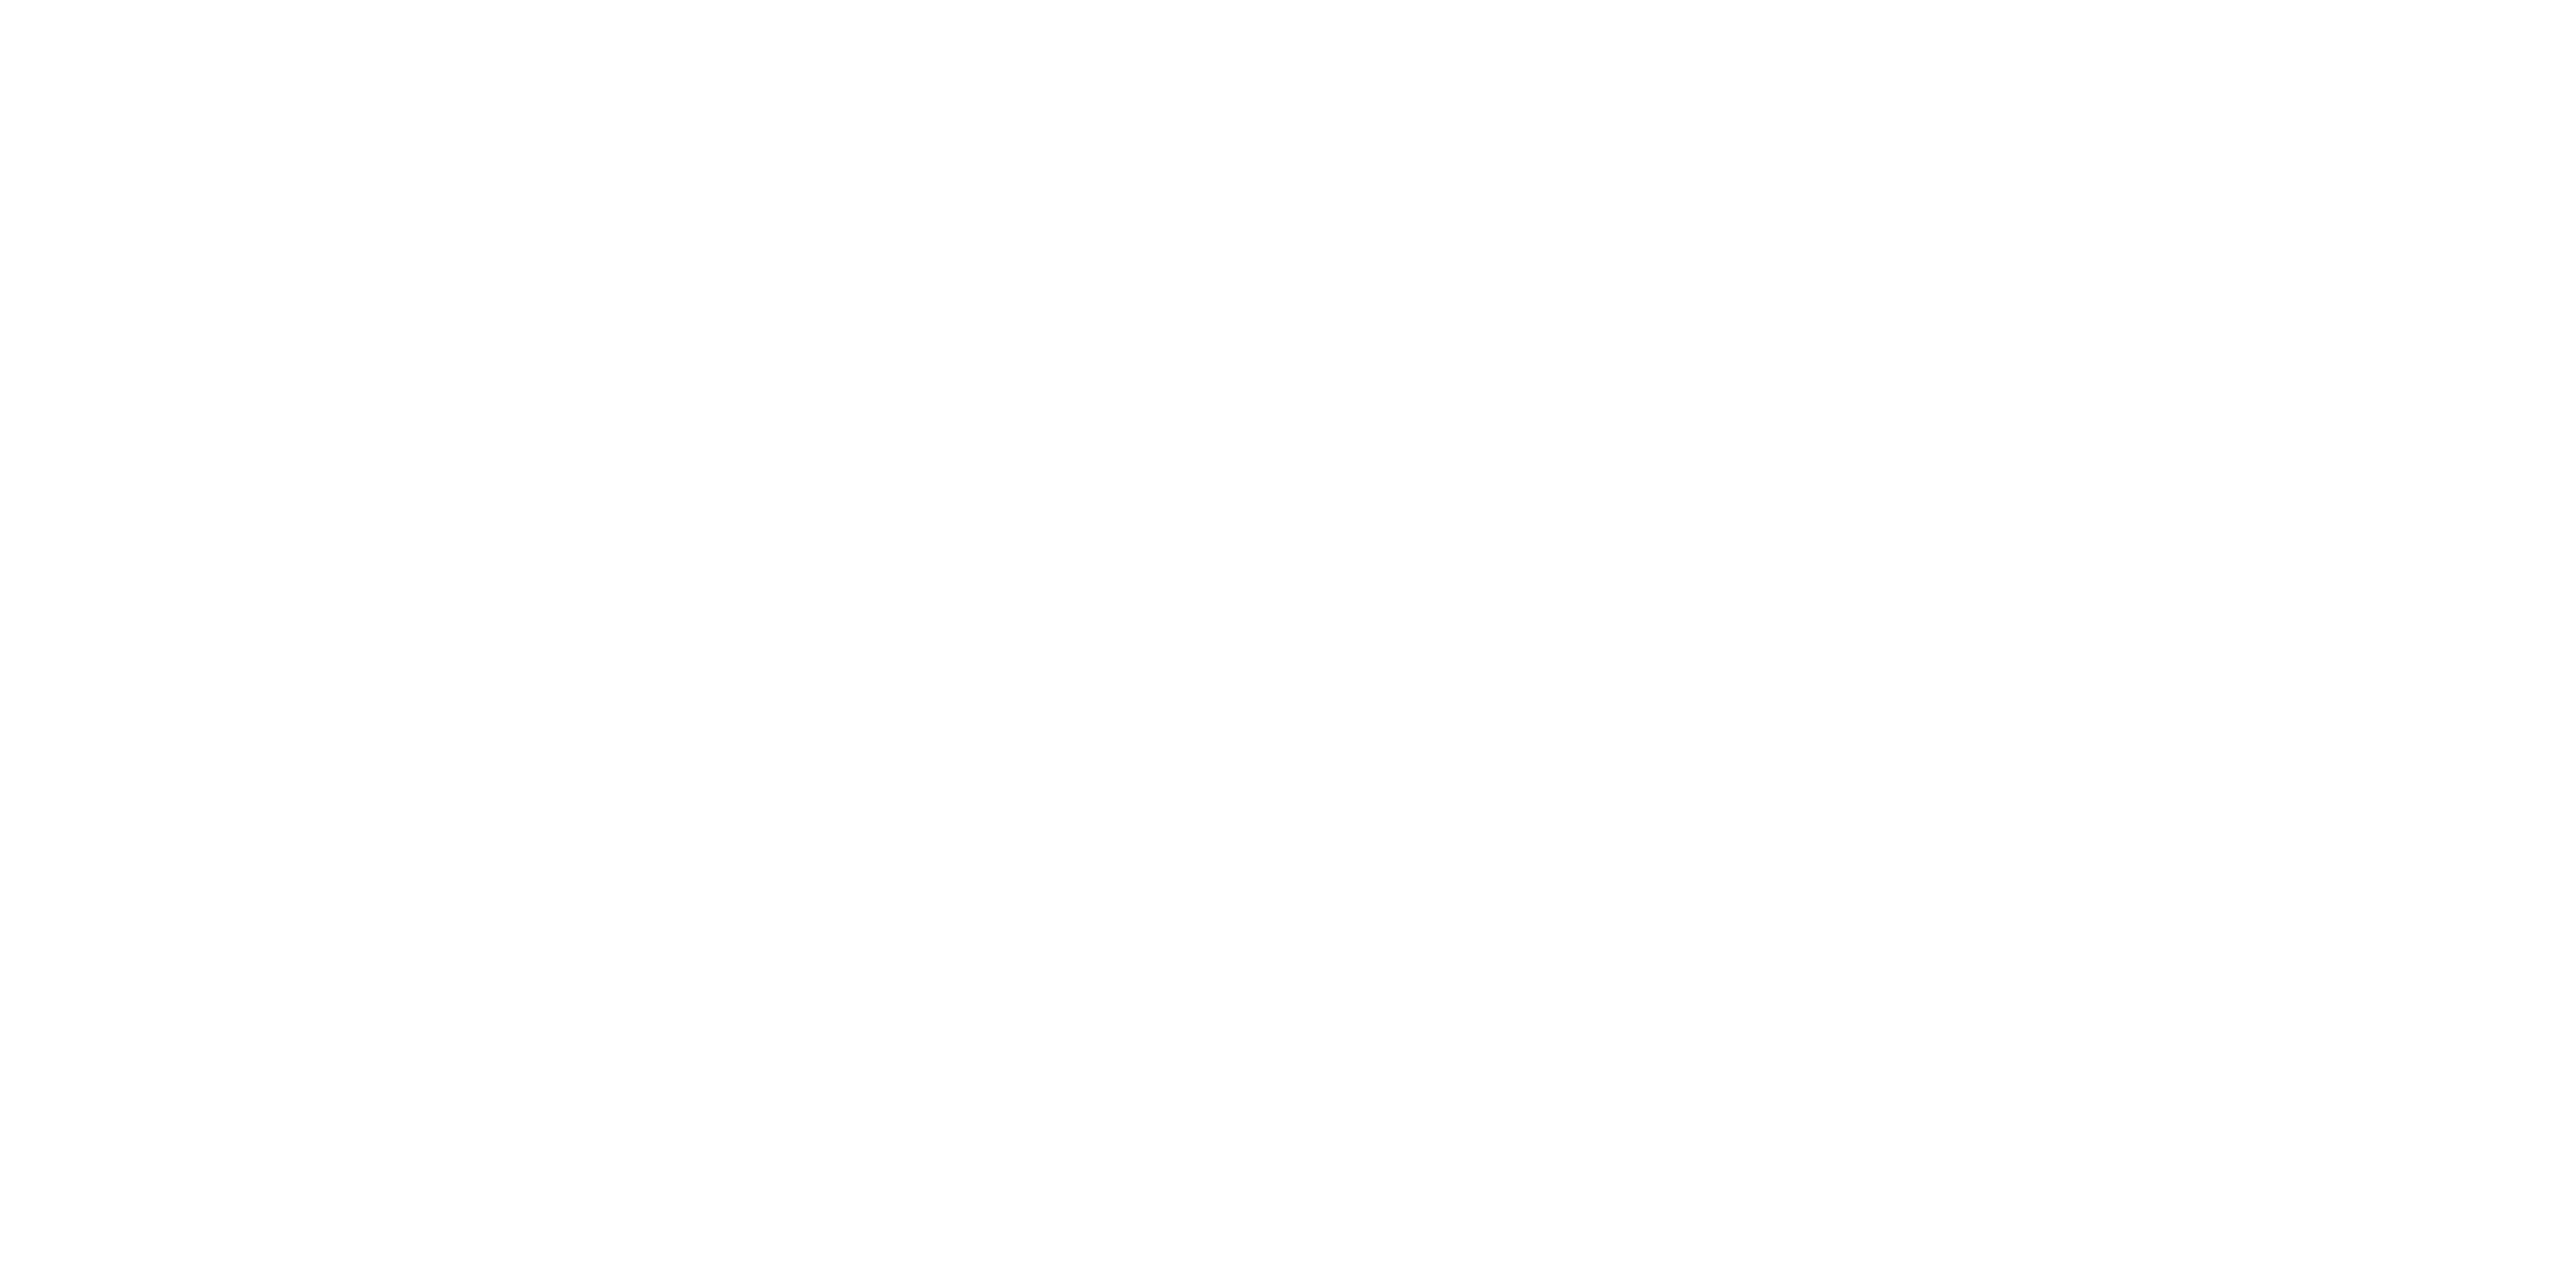

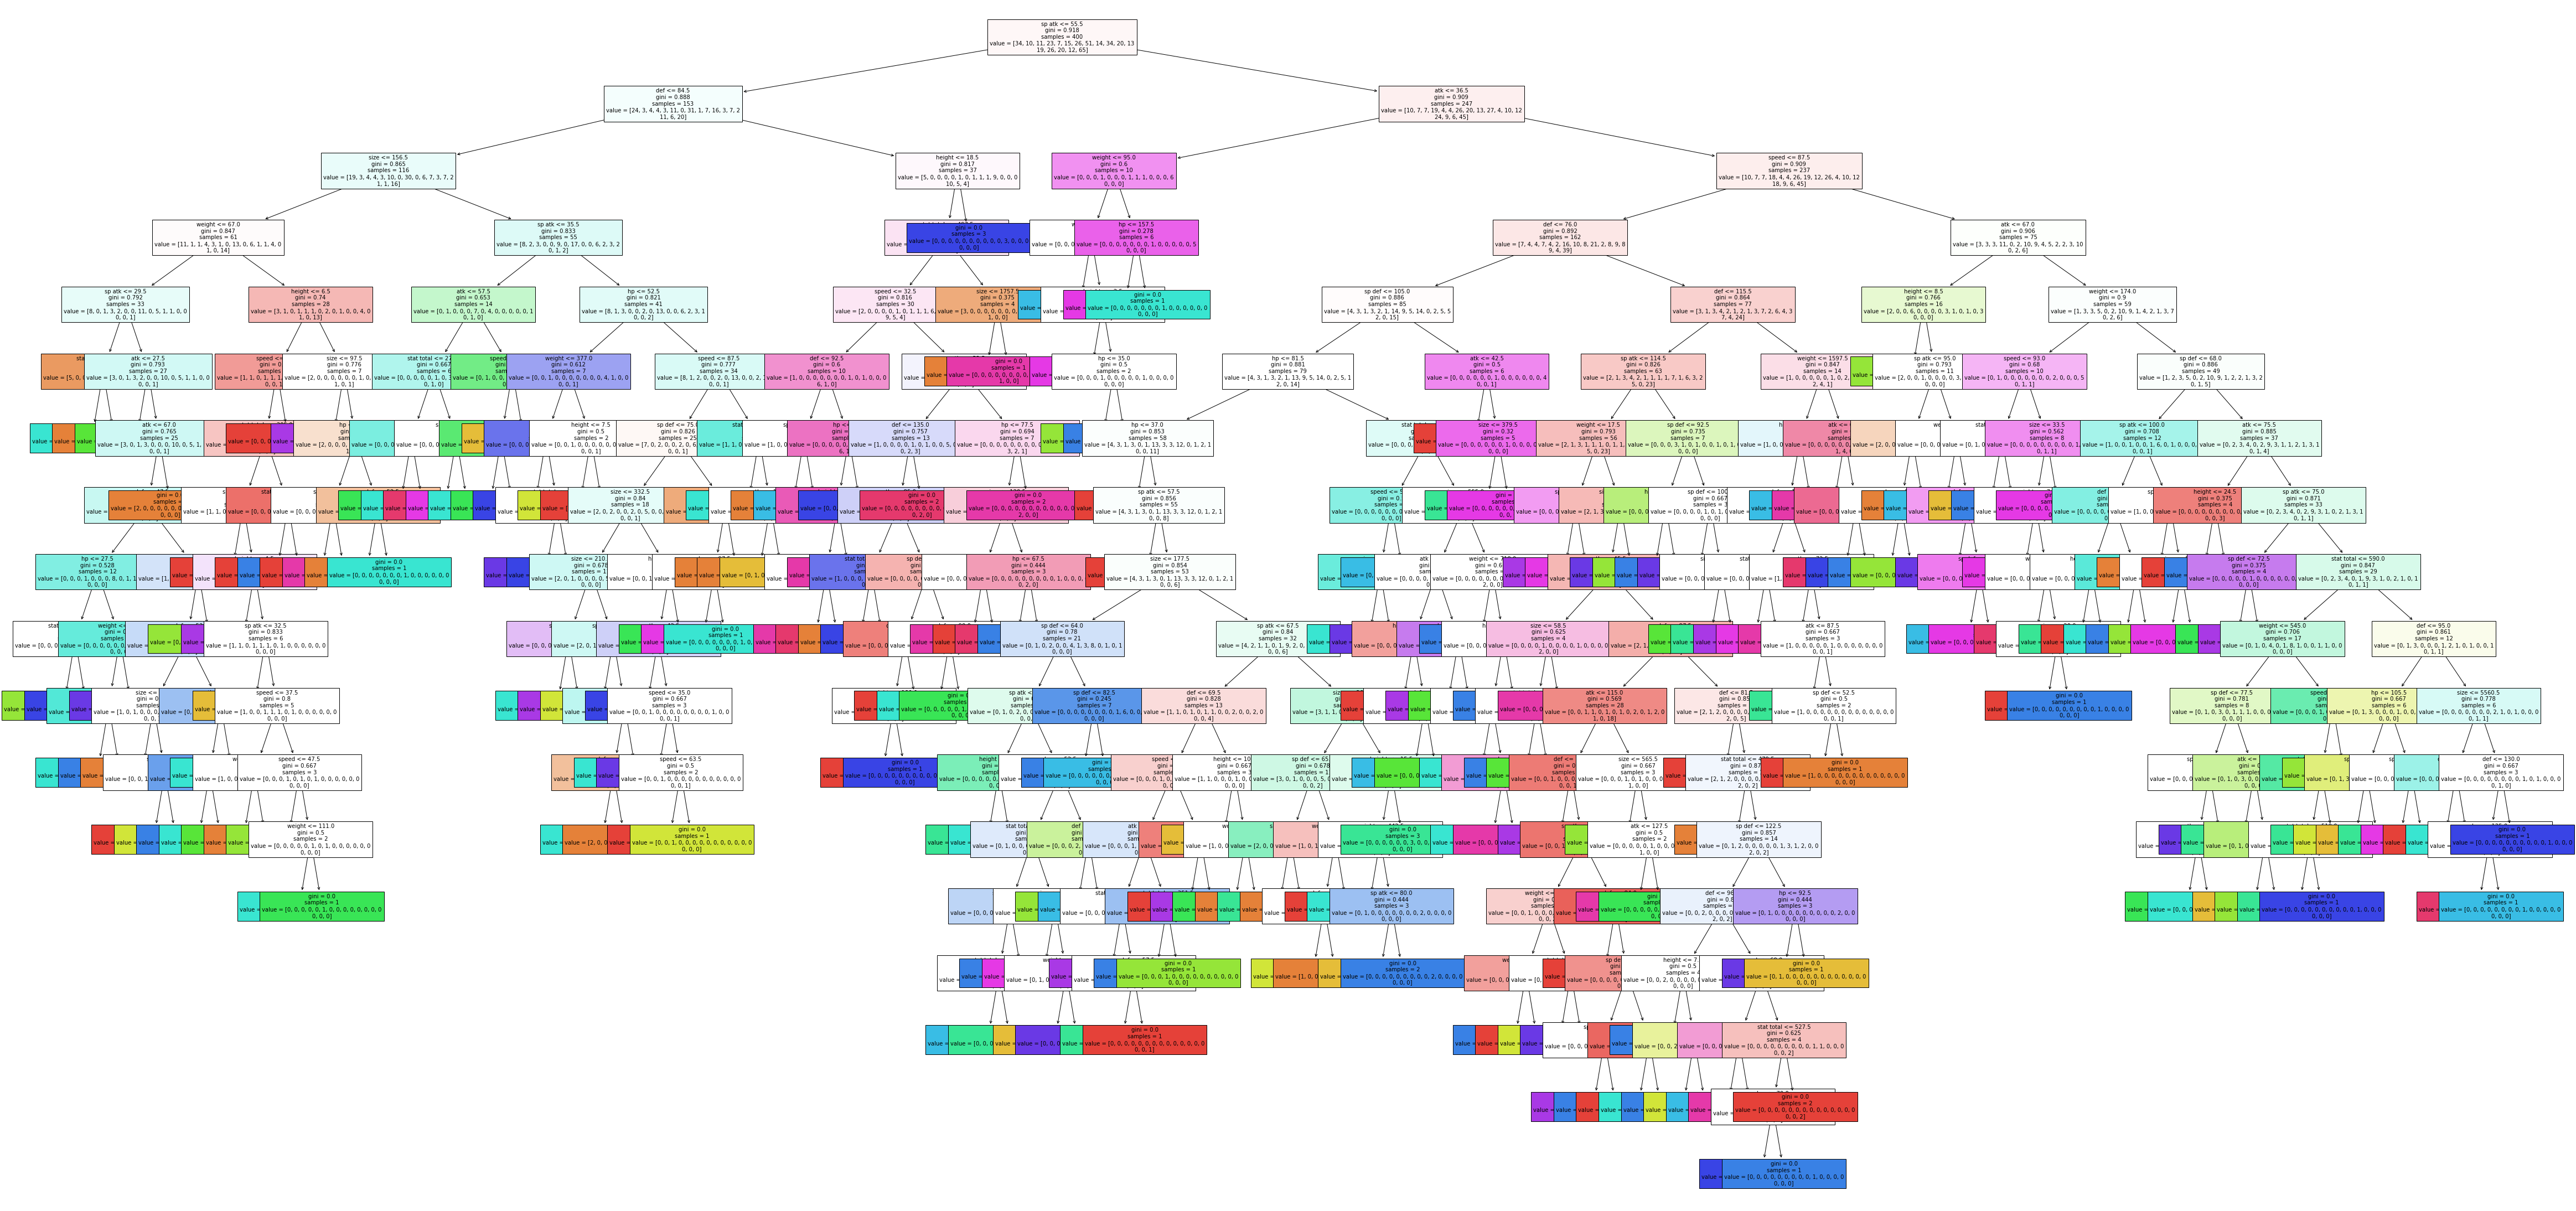

In [109]:
fig = plt.figure(figsize=(80,40))
_ = tree.plot_tree(clf, feature_names=features.columns, filled=True, fontsize=10)

According to the above tree, out of all physical and battle attributes provided, special attack, attack, and defense were the best for predicting a Pokemon's primary type. This makes sense as Pokemon types tend to specialize in either special battle attributes or non-special battle attributes.